# Ranging and Ransac

We'll use the following imports:

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

If you get an error from importing sklearn, then you will have to install it using:
conda install scikit-learn

For the exercise we will be using the data taken from a lidar by a robot in a hallway. The data is saved in `laser.csv` and we can import this in Python using numpy as such:

In [29]:
laser = np.genfromtxt('laser.csv', delimiter=',')
#print(laser)

The file contains only a single rotation of the lidar. You can open the file in any text editor to get a look at the data. Each number in the file is the distance measured in meters. The lidar starts measuring at 135 degrees and ends at -135 degrees and it rotates the same amount between each measurement. 

## Exercise 3.1
Convert the data in the csv file to x and y coordinates in a Carthesian coordinate system and plot the result using matplotlib.

Hint: Use [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) instead of plt.plot in order to show every measurement as a point. 

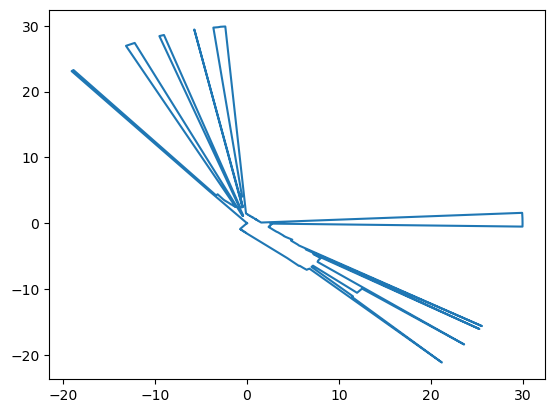

In [55]:
# Convert to x and y coordinates

N = len(laser)

angles_deg = 135 - np.linspace(0, 270, N)
angle = np.radians(angles_deg)
x = laser * np.cos(angle)
y = laser * np.sin(angle)

plt.plot(x,y)

## Exercise 3.2

We would like to locate one of the walls in the dataset. To do so we will use [Ransac](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) to fine the best line fit in the noisy data. A Ransac regressor is initialized the following way using sklearn:

In [58]:
ransac = linear_model.RANSACRegressor()

Now that we have our Ransac regressor we can fit it to a dataset (x,y):

In [63]:
# Fit data
X = x.reshape(-1, 1)
y = y
ransac.fit(X, y)

RANSACRegressor()

Finally, to get the fitted line we can use the predict function. As an argument this takes the x values in which the line will be predicted:

In [65]:
# Predict line
inliers = ransac.inlier_mask_
outliers = np.logical_not(inliers)

line_x = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
line_y_ransac = ransac.predict(line_x)

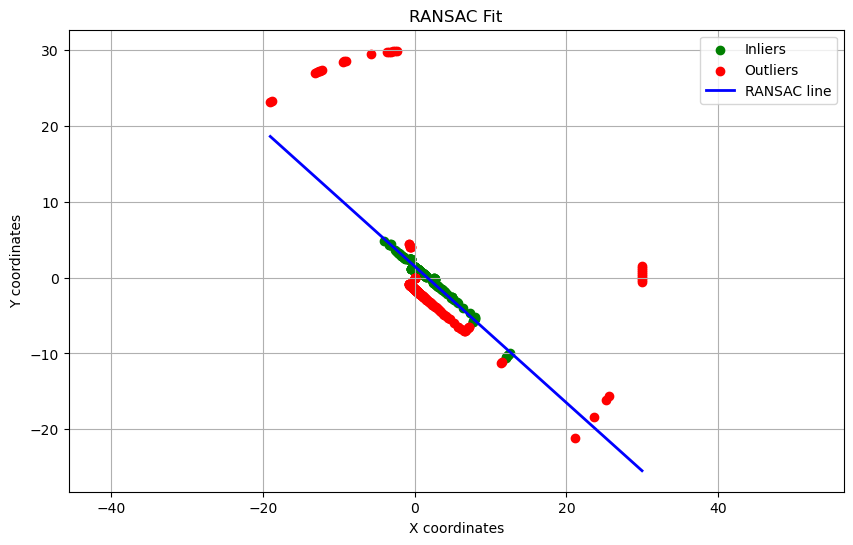

In [67]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(x[inliers], y[inliers], color='green', label='Inliers')
plt.scatter(x[outliers], y[outliers], color='red', label='Outliers')
plt.plot(line_x, line_y_ransac, color='blue', linewidth=2, label='RANSAC line')
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.title('RANSAC Fit')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()

Plot the line on top of the scatterplot from before to see the fit.

## Exercise 3.3

To see which data points were used to make the line fit and which were deemed outliers, we can use the function ransac.inlier_mask_

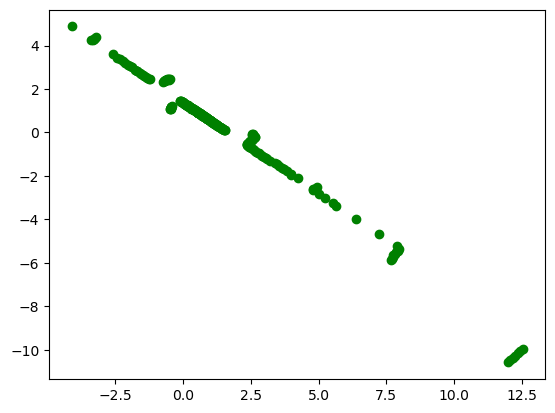

In [69]:
plt.scatter(x[ransac.inlier_mask_], y[ransac.inlier_mask_], color='green')

Find the second hallway wall using another Ransac fit and plot it together with the data points and the first ransac fit.

Hint: Use the outliers from the first Ransac.

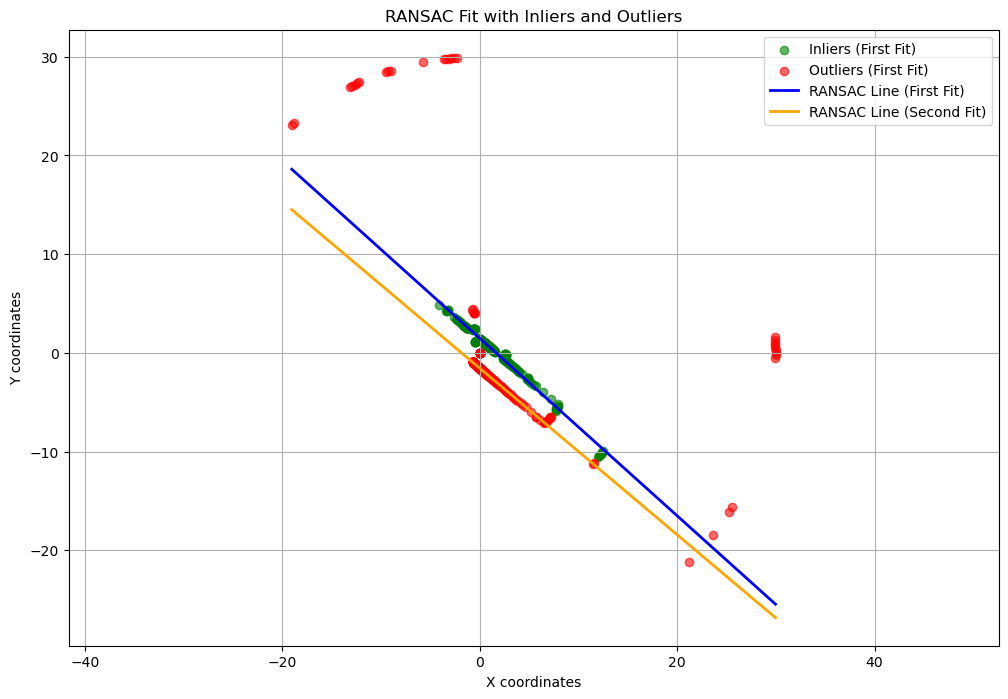

In [91]:
ransac2 = linear_model.RANSACRegressor()

# Find the second hallway wall

##Finding outliers from the second fit
# Extract inliers and outliers
inlier_x = x[inliers]
inlier_y = y[inliers]
outlier_x = x[outliers]
outlier_y = y[outliers]

outlier_X = outlier_x.reshape(-1,1)

##fiting the outlier_X with outlier_y
ransac2.fit(outlier_X, outlier_y)

##finding the line for the outliers
line_x_1 = np.linspace(outlier_X.min(), outlier_X.max(), 100).reshape(-1, 1)
line_y_ransac_1 = ransac2.predict(line_x_1)

##Plotting everything together
# Plotting everything together
plt.figure(figsize=(12, 8))

# Plot inliers from the first RANSAC fit
plt.scatter(inlier_x, inlier_y, color='green', label='Inliers (First Fit)', alpha=0.6)

# Plot outliers from the first fit
plt.scatter(outlier_x, outlier_y, color='red', label='Outliers (First Fit)', alpha=0.6)

# Plot the line from the first RANSAC fit
plt.plot(line_x, line_y_ransac, color='blue', linewidth=2, label='RANSAC Line (First Fit)')

# Plot the line from the second RANSAC fit (to the outliers)
plt.plot(line_x_1, line_y_ransac_1, color='orange', linewidth=2, label='RANSAC Line (Second Fit)')

# Plot settings
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.title('RANSAC Fit with Inliers and Outliers')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()